In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import geopandas as gpd
import plotly.graph_objects as go

In [3]:
df = pd.read_csv("../data/MER_T01_01.csv")
df

,MSN,YYYYMM,Value,Column_Order,Description,Unit
0,FFPRBUS,194913,28.740479,1,Total Fossil Fuels Production,Quadrillion Btu
1,FFPRBUS,195013,32.553205,1,Total Fossil Fuels Production,Quadrillion Btu
2,FFPRBUS,195113,35.782118,1,Total Fossil Fuels Production,Quadrillion Btu
3,FFPRBUS,195213,34.964662,1,Total Fossil Fuels Production,Quadrillion Btu
4,FFPRBUS,195313,35.338361,1,Total Fossil Fuels Production,Quadrillion Btu
...,...,...,...,...,...,...
8251,TETCBUS,202310,7.562897,12,Total Primary Energy Consumption,Quadrillion Btu
8252,TETCBUS,202311,7.845368,12,Total Primary Energy Consumption,Quadrillion Btu
8253,TETCBUS,202312,8.326081,12,Total Primary Energy Consumption,Quadrillion Btu
8254,TETCBUS,202313,93.591511,12,Total Primary Energy Consumption,Quadrillion Btu


In [8]:

descriptions = [
    "Total Fossil Fuels Consumption",
    "Total Renewable Energy Consumption",
    "Nuclear Electric Power Consumption"
]
filtered_data = df[(df['Description'].isin(descriptions)) & (~df['YYYYMM'].astype(str).str.endswith('13'))]

filtered_data['Date'] = pd.to_datetime(filtered_data['YYYYMM'], format='%Y%m', errors='coerce')
filtered_data = filtered_data.dropna(subset=['Date'])  # Drop rows where date conversion failed
filtered_data = filtered_data.sort_values('Date')

pivot_data = filtered_data.pivot_table(index='Date', columns='Description', values='Value', aggfunc='sum')

pivot_data 


Description,Nuclear Electric Power Consumption,Total Fossil Fuels Consumption,Total Renewable Energy Consumption
Date,,,
1973-01-01,0.068103,6.747651,0.219839
1973-02-01,0.064634,6.163095,0.197330
1973-03-01,0.072494,6.044647,0.218686
1973-04-01,0.064070,5.493184,0.209330
1973-05-01,0.062111,5.613551,0.215982
...,...,...,...
2023-09-01,0.684968,6.072652,0.651911
2023-10-01,0.641535,6.230196,0.690467
2023-11-01,0.650468,6.528145,0.664571


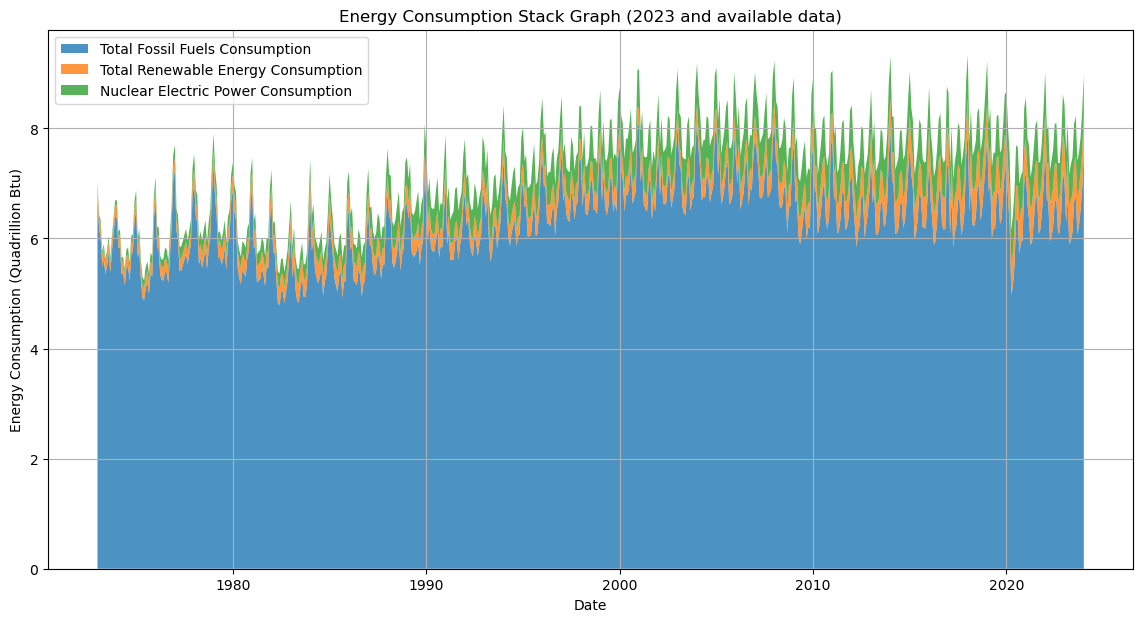

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.stackplot(pivot_data.index, pivot_data['Total Fossil Fuels Consumption'], pivot_data['Total Renewable Energy Consumption'], pivot_data['Nuclear Electric Power Consumption'],
              labels=['Total Fossil Fuels Consumption', 'Total Renewable Energy Consumption', 'Nuclear Electric Power Consumption'], alpha=0.8)

plt.title('Energy Consumption Stack Graph (2023 and available data)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (Quadrillion Btu)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


In [11]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Add traces for each energy type
fig.add_trace(go.Scatter(
    x=pivot_data.index,
    y=pivot_data['Total Fossil Fuels Consumption'],
    mode='lines',
    stackgroup='one', # define stack group
    name='Total Fossil Fuels Consumption'
))
fig.add_trace(go.Scatter(
    x=pivot_data.index,
    y=pivot_data['Total Renewable Energy Consumption'],
    mode='lines',
    stackgroup='one',
    name='Total Renewable Energy Consumption'
))
fig.add_trace(go.Scatter(
    x=pivot_data.index,
    y=pivot_data['Nuclear Electric Power Consumption'],
    mode='lines',
    stackgroup='one',
    name='Nuclear Electric Power Consumption'
))

# Set layout options
fig.update_layout(
    title='Interactive Energy Consumption Stack Graph (2023 Focus)',
    xaxis_title='Date',
    yaxis_title='Energy Consumption (Quadrillion Btu)',
    legend_title='Energy Types',
    xaxis_range=['2023-01-01', '2023-12-31']  # Focus on 2023
)

# Show the figure
fig.show()


In [51]:
df = pd.read_csv("../data/MER_T01_01.csv")

descriptions = [
    "Total Fossil Fuels Production",
    "Total Renewable Energy Production",
    "Nuclear Electric Power Production",
    "Total Primary Energy Consumption"
]
filtered_data = df[(df['Description'].isin(descriptions)) & (~df['YYYYMM'].astype(str).str.endswith('13'))]


In [52]:

filtered_data['Year'] = pd.to_datetime(filtered_data['YYYYMM'], format='%Y%m', errors='coerce').dt.year
filtered_data = filtered_data.dropna(subset=['Year'])  # Drop rows where date conversion failed
filtered_data = filtered_data.sort_values('Year')



In [53]:
filtered_data

,MSN,YYYYMM,Value,Column_Order,Description,Unit,Year
24,FFPRBUS,197301,4.932632,1,Total Fossil Fuels Production,Quadrillion Btu,1973
1402,REPRBUS,197303,0.218686,3,Total Renewable Energy Production,Quadrillion Btu,1973
1403,REPRBUS,197304,0.209330,3,Total Renewable Energy Production,Quadrillion Btu,1973
1404,REPRBUS,197305,0.215982,3,Total Renewable Energy Production,Quadrillion Btu,1973
1405,REPRBUS,197306,0.208249,3,Total Renewable Energy Production,Quadrillion Btu,1973
...,...,...,...,...,...,...,...
8250,TETCBUS,202309,7.409894,12,Total Primary Energy Consumption,Quadrillion Btu,2023
1375,NUETBUS,202401,0.721745,2,Nuclear Electric Power Production,Quadrillion Btu,2024
687,FFPRBUS,202401,7.070029,1,Total Fossil Fuels Production,Quadrillion Btu,2024
2063,REPRBUS,202401,0.686291,3,Total Renewable Energy Production,Quadrillion Btu,2024


In [54]:
anual_data = filtered_data.groupby(["Year","Description"]).agg({"Value":"sum"}).unstack()
anual_data

Value                                \
Description Nuclear Electric Power Production Total Fossil Fuels Production   
Year                                                                          
1973                                 0.910178                     58.209277   
1974                                 1.272084                     56.294375   
1975                                 1.899797                     54.696533   
1976                                 2.111119                     54.684224   
1977                                 2.701763                     55.062617   
1978                                 3.024125                     55.030740   
1979                                 2.775826                     57.952451   
1980                                 2.739169                     58.979988   
1981                                 3.007592                     58.487963   
1982                                 3.131149                     57.415860   
1983                                 3.202549                     54.368173   
1984                                 3.552531                     58.809192   
1985                                 4.075563                     57.501723   
1986                                 4.380109                     56.539006   
1987                                 4.753932                     57.130641   
1988                                 5.586967                     57.845856   
1989                                 5.602160                     57.447704   
1990                                 6.104349                     58.523187   
1991                                 6.422134                     57.831150   
1992                                 6.479207                     57.614680   
1993                                 6.410498                     55.780270   
1994                                 6.693877                     58.002043   
1995                                 7.075435                     57.496397   
1996                                 7.086675                     58.337657   
1997                                 6.596992                     58.806283   
1998                                 7.067811                     59.265921   
1999                                 7.610254                     57.559794   
2000                                 7.862352                     57.306572   
2001                                 8.028853                     58.484746   
2002                                 8.145428                     56.776711   
2003                                 7.959622                     55.982583   
2004                                 8.222774                     55.884019   
2005                                 8.160811                     54.995303   
2006                                 8.214627                     55.876707   
2007                                 8.458591                     56.369113   
2008                                 8.426492                     57.526853   
2009                                 8.355220                     56.611551   
2010                                 8.434434                     58.159290   
2011                                 8.268699                     60.529498   
2012                                 8.061821                     62.297745   
2013                                 8.244432                     64.179523   
2014                                 8.337559                     69.618994   
2015                                 8.336886                     70.186279   
2016                                 8.426753                     65.434558   
2017                                 8.418968                     68.448418   
2018                                 8.438068                     75.780470   
2019                                 8.451852                     81.398890   
2020                                 8.251074                     76.145105   
2021       

In [55]:
anual_data.columns

MultiIndex([('Value', 'Nuclear Electric Power Production'),
            ('Value',     'Total Fossil Fuels Production'),
            ('Value',  'Total Primary Energy Consumption'),
            ('Value', 'Total Renewable Energy Production')],
           names=[None, 'Description'])

In [56]:
rate_data = anual_data.pct_change().dropna() * 100
rate_data

Value                                \
Description Nuclear Electric Power Production Total Fossil Fuels Production   
Year                                                                          
1974                                39.762112                     -3.289685   
1975                                49.345248                     -2.838369   
1976                                11.123399                     -0.022504   
1977                                27.977769                      0.691960   
1978                                11.931542                     -0.057892   
1979                                -8.210606                      5.309234   
1980                                -1.320580                      1.773069   
1981                                 9.799432                     -0.834224   
1982                                 4.108170                     -1.833032   
1983                                 2.280313                     -5.308093   
1984                                10.928232                      8.168417   
1985                                14.722799                     -2.223239   
1986                                 7.472489                     -1.674240   
1987                                 8.534559                      1.046419   
1988                                17.523074                      1.251894   
1989                                 0.271936                     -0.688298   
1990                                 8.964203                      1.872108   
1991                                 5.205879                     -1.182501   
1992                                 0.888692                     -0.374314   
1993                                -1.060454                     -3.183928   
1994                                 4.420546                      3.983080   
1995                                 5.700105                     -0.871773   
1996                                 0.158859                      1.463153   
1997                                -6.909912                      0.803299   
1998                                 7.136874                      0.781614   
1999                                 7.674837                     -2.878766   
2000                                 3.312610                     -0.439929   
2001                                 2.117700                      2.055914   
2002                                 1.451951                     -2.920479   
2003                                -2.281108                     -1.398686   
2004                                 3.306087                     -0.176062   
2005                                -0.753553                     -1.590286   
2006                                 0.659444                      1.602690   
2007                                 2.969873                      0.881237   
2008                                -0.379484                      2.053855   
2009                                -0.845809                     -1.591087   
2010                                 0.948078                      2.733963   
2011                                -1.964981                      4.075373   
2012                                -2.501941                      2.921298   
2013                                 2.265133                      3.020620   
2014                                 1.129574                      8.475400   
2015                                -0.008072                      0.814842   
2016                                 1.077944                     -6.770157   
2017                                -0.092384                      4.605915   
2018                                 0.226869                     10.711792   
2019                                 0.163355                      7.414074   
2020                                -2.375550                     -6.454369   
2021                                -1.456295                      2.308784   
2022       

In [57]:
rate_data.drop(2024, inplace=True)

In [66]:
rate_fig = go.Figure()

# Add traces for the rate of change of each energy type with specified colors
rate_fig.add_trace(go.Scatter(
    x=rate_data.index,
    y=rate_data[('Value', 'Total Fossil Fuels Production')],
    mode='lines',
    name='Total Fossil Fuels Consumption',
    fillcolor='brown'
))
rate_fig.add_trace(go.Scatter(
    x=rate_data.index,
    y=rate_data[('Value', 'Total Renewable Energy Production')],
    mode='lines',
    name='Total Renewable Energy Consumption',
    fillcolor='green'
))
rate_fig.add_trace(go.Scatter(
    x=rate_data.index,
    y=rate_data[('Value', 'Nuclear Electric Power Production')],
    mode='lines',
    name='Nuclear Electric Power Consumption',
    fillcolor='blue'
))

rate_fig.add_trace(go.Bar(
    x=rate_data.index,
    y=rate_data[('Value', 'Total Primary Energy Consumption')],
    name='Total Primary Energy Consumption',
))

# Set layout options including figure size
rate_fig.update_layout(
    title='Monthly Increase Rate of Energy Production',
    xaxis_title='Date',
    yaxis_title='Increase Rate (%)',
    legend_title='Energy Types',
    width=1000,  # Width of the figure in pixels
    height=600   # Height of the figure in pixels
)

# Show the figure
rate_fig.show()